<a href="https://colab.research.google.com/github/viniciusgomesbatista/pythonintermediario/blob/main/Geo%20Analytics/Geo_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo sobre regiões produtoras

In [1]:
# Instalando e atualizando as bibliotecas para uma determinada versão
!pip install geopandas==0.8.2
!pip install --upgrade pyshp
!pip install shapely  ==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.8/962.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires geopandas>=0.12.2, but you have geopandas 0.8.2 which is incompatible.
ERROR: Invalid requirement: '==1.7.0'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Dica de estudo : ambientes e biblioteca poetry

In [5]:
# importar as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

In [8]:
# # links dos arquivos
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/'
link_p = 'https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/'

#ler os arquivos
dados = pd.read_csv(link_p + 'qtde-22.csv', encoding = 'latin1')

Análise Exploratória

In [9]:
dados.head()

,ibge7,mun,nome_meso,abacate,abacaxi,alho,amendoim,arroz,aveia,banana,...,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,0,47,...,18,0,0,0,8028,11685,1212,100,0,0
1,3100203,Abaeté,Central Mineira,0,540,0,0,8,0,28,...,0,0,0,63,4680,1404,0,0,0,0
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,0,50,...,170,0,0,0,780,0,0,0,0,0
3,3100401,Acaiaca,Zona da Mata,0,0,0,2,0,0,56,...,33,0,7,0,202,0,0,0,0,0
4,3100500,Açucena,Vale do Rio Doce,0,0,3,6,1,0,170,...,74,0,0,0,942,0,0,0,0,0


In [10]:
dados.columns

Index(['ibge7', 'mun', 'nome_meso', 'abacate', 'abacaxi', 'alho', 'amendoim',
       'arroz', 'aveia', 'banana', 'batata-doce', 'batata-inglesa',
       'cafe_total', 'cafe_arab', 'cana', 'feijao', 'girassol', 'laranja',
       'maracuja', 'milho', 'soja', 'sorgo', 'tomate', 'trigo', 'uva'],
      dtype='object')

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ibge7           853 non-null    int64 
 1   mun             853 non-null    object
 2   nome_meso       853 non-null    object
 3   abacate         853 non-null    int64 
 4   abacaxi         853 non-null    int64 
 5   alho            853 non-null    int64 
 6   amendoim        853 non-null    int64 
 7   arroz           853 non-null    int64 
 8   aveia           853 non-null    int64 
 9   banana          853 non-null    int64 
 10  batata-doce     853 non-null    int64 
 11  batata-inglesa  853 non-null    int64 
 12  cafe_total      853 non-null    int64 
 13  cafe_arab       853 non-null    int64 
 14  cana            853 non-null    int64 
 15  feijao          853 non-null    int64 
 16  girassol        853 non-null    int64 
 17  laranja         853 non-null    int64 
 18  maracuja  

In [12]:
dados.rename(columns={'mun':'municipio','ibge7': 'mun'}, inplace=True)

In [13]:
dados.columns

Index(['mun', 'municipio', 'nome_meso', 'abacate', 'abacaxi', 'alho',
       'amendoim', 'arroz', 'aveia', 'banana', 'batata-doce', 'batata-inglesa',
       'cafe_total', 'cafe_arab', 'cana', 'feijao', 'girassol', 'laranja',
       'maracuja', 'milho', 'soja', 'sorgo', 'tomate', 'trigo', 'uva'],
      dtype='object')

In [14]:
dados.describe()

,mun,abacate,abacaxi,alho,amendoim,arroz,aveia,banana,batata-doce,batata-inglesa,...,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,...,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,3.136982e+06,59.497069,263.050410,47.317702,14.404455,9.854631,19.395076,803.600234,56.187573,1103.856975,...,584.338804,16.218054,1115.169988,22.391559,7916.076202,6235.116061,875.453693,670.894490,233.350528,16.043376
std,2.072104e+04,470.218223,3233.696873,703.089075,231.172947,64.324040,142.407337,6226.590290,507.597707,8653.588761,...,3462.123081,217.716423,10910.119355,119.607659,27801.123319,31690.405978,5387.953822,3986.158435,1160.602124,161.820451
min,3.100104e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.119500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.137304e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,45.000000,0.000000,0.000000,0.000000,505.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.154903e+06,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,145.000000,0.000000,0.000000,...,175.000000,0.000000,12.000000,0.000000,2781.000000,129.000000,0.000000,60.000000,0.000000,0.000000
max,3.172202e+06,10080.000000,60000.000000,16830.000000,5508.000000,1400.000000,1904.000000,154710.000000,10060.000000,177400.000000,...,68400.000000,5137.000000,202400.000000,2806.000000,348000.000000,500250.000000,112500.000000,72000.000000,12388.000000,3059.000000


In [15]:
dados.describe(include='O')

,municipio,nome_meso
count,853,853
unique,853,12
top,Abadia dos Dourados,Sul/Sudoeste de Minas
freq,1,146


In [16]:
dados['nome_meso'].unique()

array(['Triângulo Mineiro/Alto Paranaíba', 'Central Mineira',
       'Zona da Mata', 'Vale do Rio Doce', 'Oeste de Minas',
       'Vale do Mucuri', 'Norte de Minas', 'Sul/Sudoeste de Minas',
       'Campo das Vertentes', 'Jequitinhonha',
       'Metropolitana de Belo Horizonte', 'Noroeste de Minas'],
      dtype=object)

In [19]:
dados.groupby('nome_meso')['municipio'].nunique()

nome_meso
Campo das Vertentes                  36
Central Mineira                      30
Jequitinhonha                        51
Metropolitana de Belo Horizonte     105
Noroeste de Minas                    19
Norte de Minas                       89
Oeste de Minas                       44
Sul/Sudoeste de Minas               146
Triângulo Mineiro/Alto Paranaíba     66
Vale do Mucuri                       23
Vale do Rio Doce                    102
Zona da Mata                        142
Name: municipio, dtype: int64

In [20]:
# ler o shapefile
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/mg.json'
geodf = gp.read_file(link)

In [24]:
type(geodf)

geopandas.geodataframe.GeoDataFrame

In [21]:
geodf.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1..."
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1..."
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1..."
3,ACAIACA,3100401,"POLYGON ((-43.02387 -20.41022, -43.03283 -20.4..."
4,AÇUCENA,3100500,"POLYGON ((-42.36208 -18.92569, -42.36636 -18.9..."


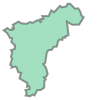

In [23]:
geodf['geometry'].iloc[10]

In [25]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  853 non-null    object  
 1   CD_GEOCMU   853 non-null    object  
 2   geometry    853 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 20.1+ KB


In [26]:
# tratar colunas
geodf.rename(columns={'CD_GEOCMU':'mun'},inplace=True)
geodf['mun'] = geodf['mun'].astype(int)

In [27]:
# mesclar dataframe com o shapefile
mg = pd.merge(geodf,dados, on='mun')

In [28]:
mg.columns

Index(['NM_MUNICIP', 'mun', 'geometry', 'municipio', 'nome_meso', 'abacate',
       'abacaxi', 'alho', 'amendoim', 'arroz', 'aveia', 'banana',
       'batata-doce', 'batata-inglesa', 'cafe_total', 'cafe_arab', 'cana',
       'feijao', 'girassol', 'laranja', 'maracuja', 'milho', 'soja', 'sorgo',
       'tomate', 'trigo', 'uva'],
      dtype='object')

In [29]:
mg.shape

(853, 27)

In [30]:
mg.head()

,NM_MUNICIP,mun,geometry,municipio,nome_meso,abacate,abacaxi,alho,amendoim,arroz,...,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1...",Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,...,18,0,0,0,8028,11685,1212,100,0,0
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1...",Abaeté,Central Mineira,0,540,0,0,8,...,0,0,0,63,4680,1404,0,0,0,0
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1...",Abre Campo,Zona da Mata,0,0,0,0,0,...,170,0,0,0,780,0,0,0,0,0
3,ACAIACA,3100401,"POLYGON ((-43.02387 -20.41022, -43.03283 -20.4...",Acaiaca,Zona da Mata,0,0,0,2,0,...,33,0,7,0,202,0,0,0,0,0
4,AÇUCENA,3100500,"POLYGON ((-42.36208 -18.92569, -42.36636 -18.9...",Açucena,Vale do Rio Doce,0,0,3,6,1,...,74,0,0,0,942,0,0,0,0,0


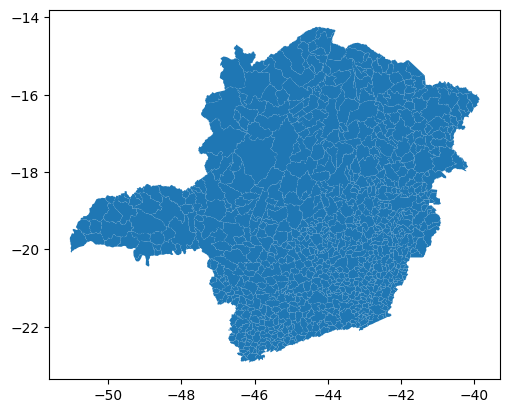

In [31]:
mg.plot();

In [32]:
mg.columns

Index(['NM_MUNICIP', 'mun', 'geometry', 'municipio', 'nome_meso', 'abacate',
       'abacaxi', 'alho', 'amendoim', 'arroz', 'aveia', 'banana',
       'batata-doce', 'batata-inglesa', 'cafe_total', 'cafe_arab', 'cana',
       'feijao', 'girassol', 'laranja', 'maracuja', 'milho', 'soja', 'sorgo',
       'tomate', 'trigo', 'uva'],
      dtype='object')

<Axes: >

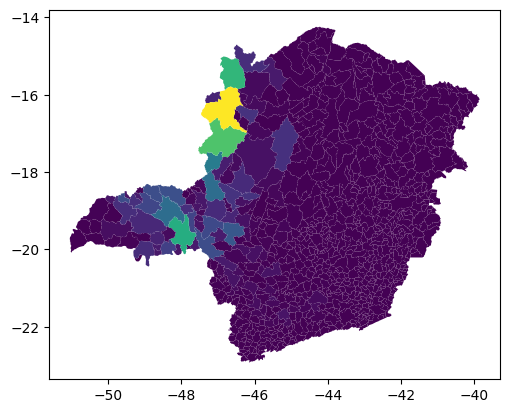

In [33]:
# mapa temática de acordo com a produção
mg.plot('soja')

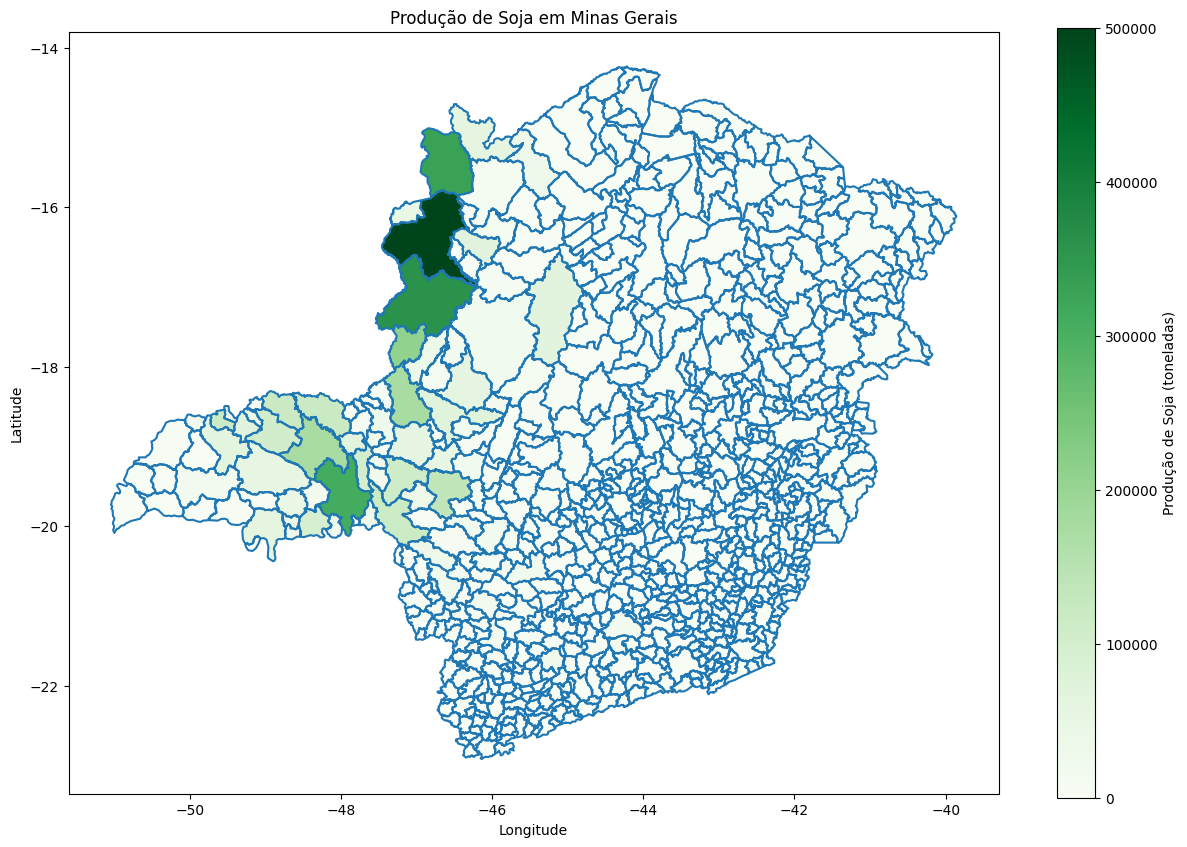

In [46]:
# Adicionar mais detalhes no mapa
fig, ax = plt.subplots(figsize=(15,10))
mg.boundary.plot(ax=ax)
mg.plot(column='soja', ax=ax, legend=True, legend_kwds={'label': "Produção de Soja (toneladas)"},
        cmap='Greens', missing_kwds={"color": "lightgrey", "label": "Sem dados"})
ax.set_title('Produção de Soja em Minas Gerais')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 4 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


<Axes: >

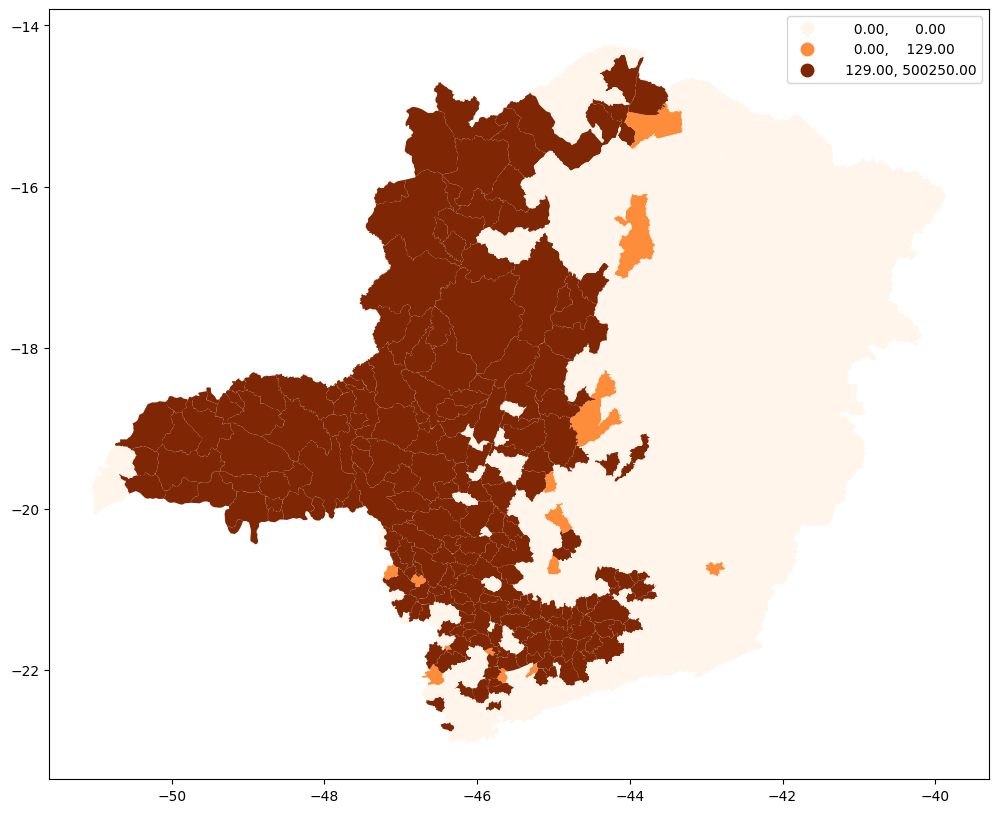

In [51]:
# mapa tenha segmentações
mg.plot(column='soja', scheme='quantiles', k=4, legend=True,cmap='Oranges', figsize=(15,10))

<Axes: >

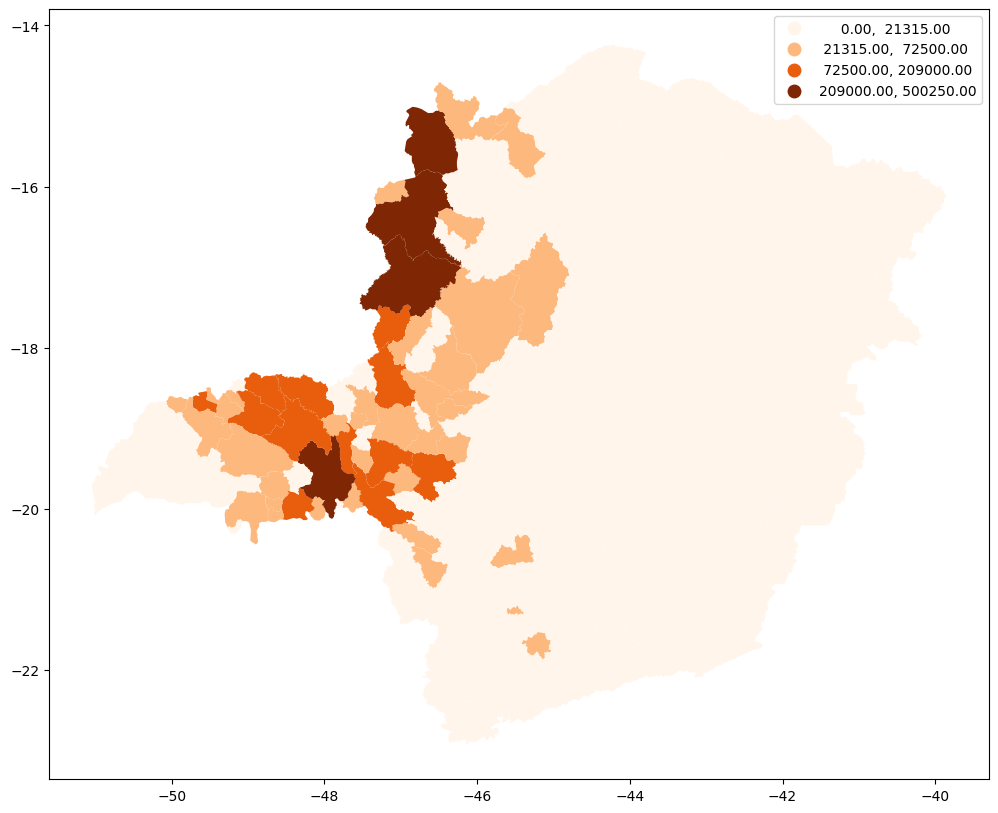

In [52]:
# mapa por segmentação
mg.plot(column='soja', scheme='fisher_jenks', k=4, legend=True,cmap='Oranges', figsize=(15,10))

<Axes: >

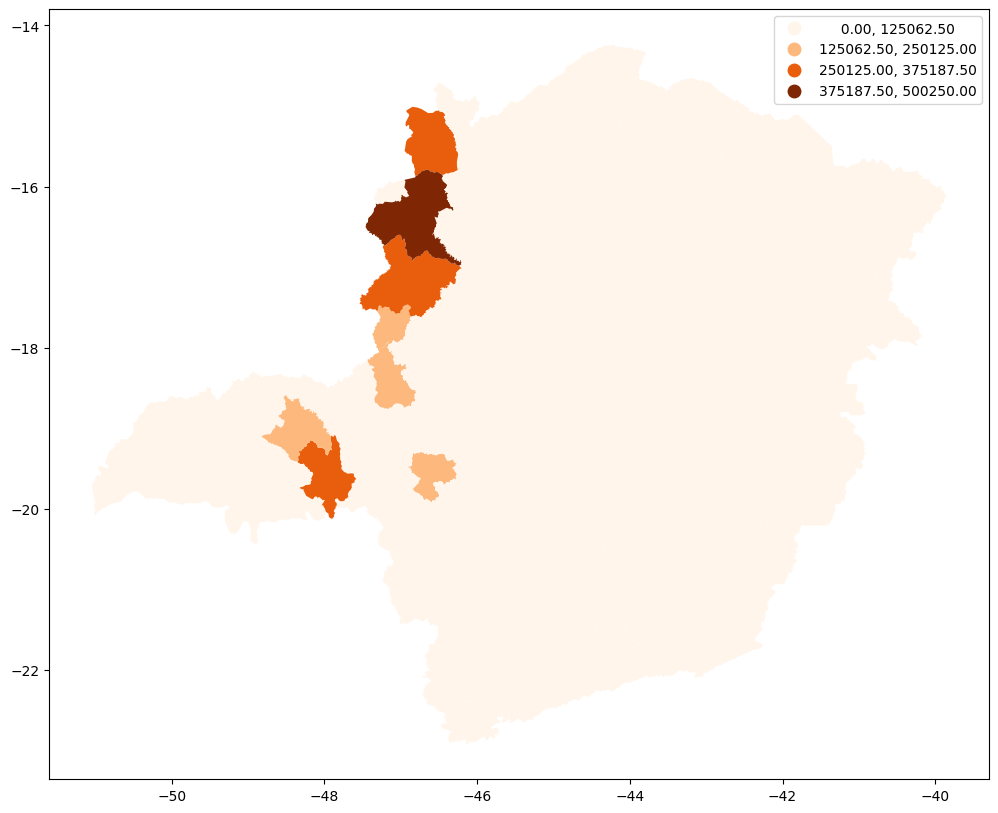

In [53]:
# classificação intervalos iguais
mg.plot(column='soja', scheme='equal_interval', k=4, legend=True,cmap='Oranges', figsize=(15,10))

## Criando matriz de vizinhança

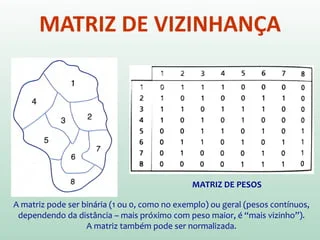

In [54]:
# criar uma matriz de vizinhança no formato queen
w = Queen.from_dataframe(mg)
w.transform = 'r'

<ipython-input-54-b616f92bd6a9>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(mg)


# I de Moran

Estatística mais utilizada para medir a autocorrelação espacial. Ela mede a relação do desvio padronizado de uma variável numa área com o desvio padronizado das áreas vizinhas para a mesma variável:

$$I=\frac{N}{S_{0}}\frac{\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{n}w_{ij}z_{i}z_{j}}{\displaystyle\sum_{i=1}^{n}z^{2}_{i}},$$
em que:

- $z_i = y_i - \bar{y}$ representa o desvio em relação à média da variável.
- $y_i$: valor da variável em um determinado local $i$
- $N$: número de observações
- $S_0 = \sum\sum w_{ij}$
- $E[I] = -1/(N - 1) \approx 0$
            
Se o valor-$p$ referente ao teste do $I$ de Moran for significativo, podemos olhar para o valor da estatística $I$ e concluir:

- $I > 0$: autocorrelação espacial positiva (*clusters* espaciais - HH, LL)
- $I < 0$: autocorrelação espacial negativa (*outliers* espaciais - HL, LH)

In [77]:
# calcular I de Moran pra soja
y = mg['soja'].values #cria o array
moran = Moran(y, w) # cria uma matriz de pesos espaciais
moran.I # calcula o índice de Moran

0.4983387682998699

In [78]:
# valor-p
moran.p_sim

0.001

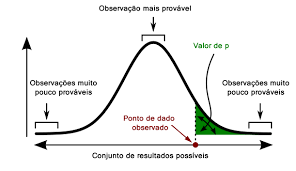

### Contra exemplo

In [75]:
# calcular I de Moran para arroz
y = mg['arroz'].values
moran_a = Moran(y, w)
moran_a.I

0.024695925506813213

In [76]:
# valor-p para arroz
moran_a.p_sim

0.07

Arroz tem um baixo índice de autocorrelação e não tem siginificância adequada, logo não posso afirmar que existe um autocorrelação de produção de arroz em relação a proximidade dos munípios com os seus vizinhos.

### Plotar minha dispersão de Moran

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.5', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.5)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

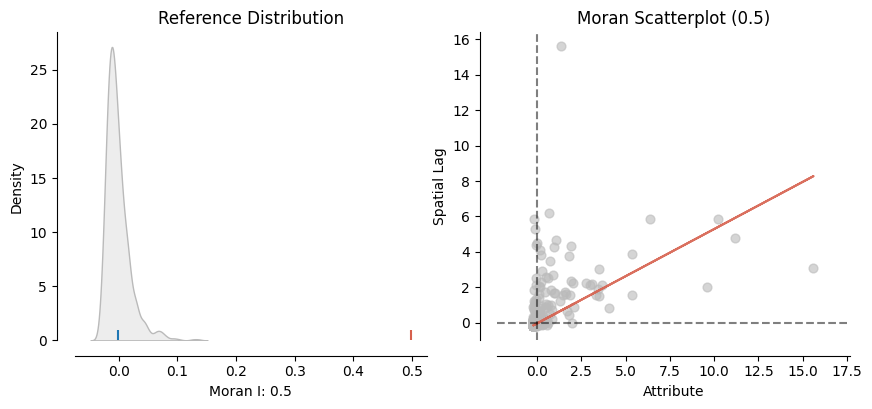

In [80]:
plot_moran(moran)

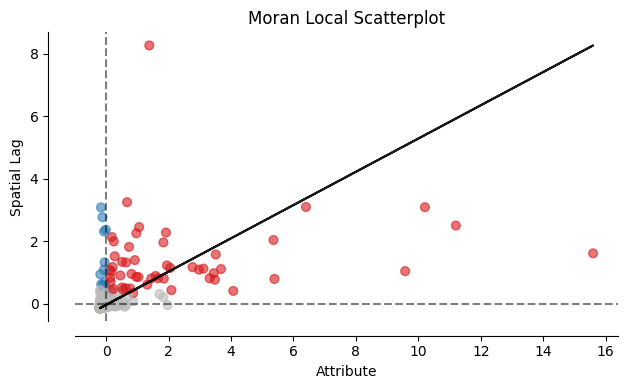

In [81]:
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

# LISA

- Estatística para detectar padrões locais de autocorrelação espacial: *Local Indicator of Spatial Association* (LISA), ou $I$ de Moran local  
- Permite verificar se há agrupamentos espaciais estatisticamente significativos
- Útil quando a estatística $I$ de Moran global for significativa

$$I_{i}=z_{i}\sum_{j=1}^{j}w_{ij}y_{j}$$  

(<Figure size 640x480 with 1 Axes>, <Axes: >)

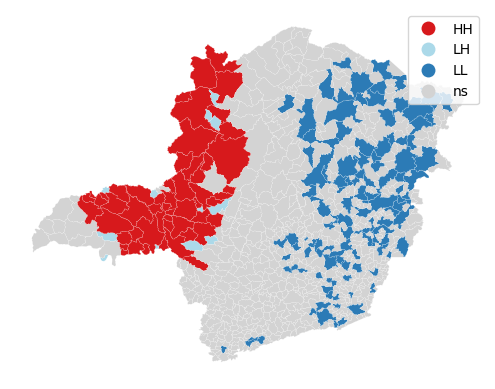

In [82]:
lisa_cluster(moran_loc, mg, p=0.05)

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

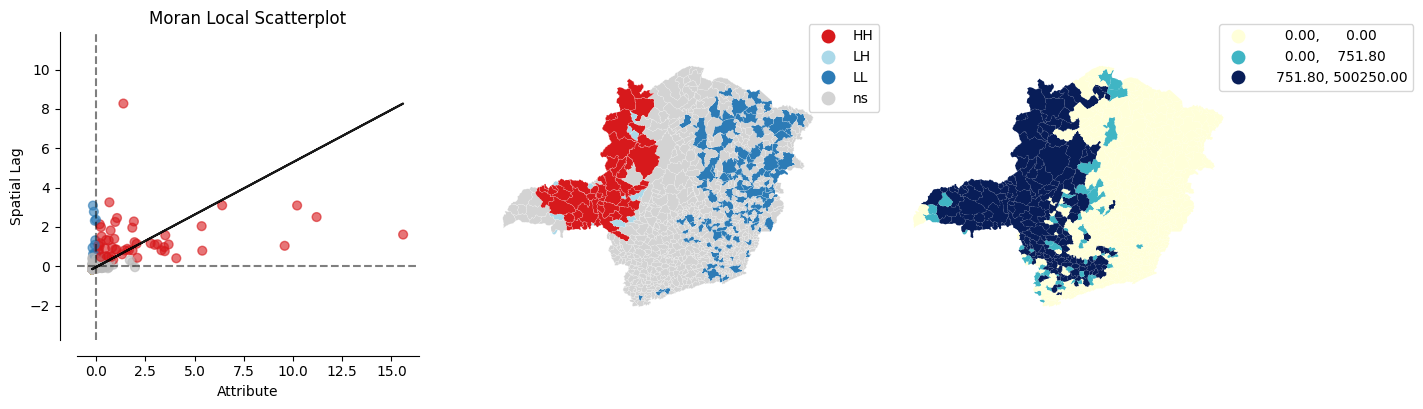

In [83]:
plot_local_autocorrelation(moran_loc, mg, 'soja')